# introduction to Deep Learning 


We'll cover the following:
- (does Neural Network Can Do what ML Do???)
    - Linear Regression using ML
    - Linear Regression using SLP
- is MLP is enough for all problems???
    - MLP on mnist data
    - MLP on cifar10 data 

# does Neural Network Can Do what ML Do???

#### read salary data

In [4]:
import pandas as pd
data = pd.read_csv("Salary.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### extract input and output of the model

In [46]:
X = data[["YearsExperience"]]
y = data["Salary"]

#### visualize data

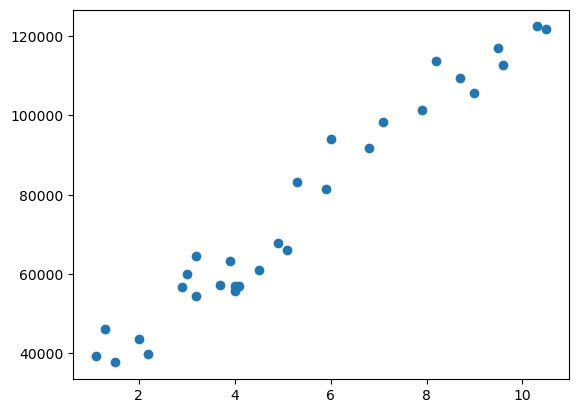

In [63]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

#### ML model

In [55]:
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()
model.fit(X,y)

LinearRegression()

#### predict new data

In [61]:
model.predict(np.array([[1.1]]))

C:\Users\hossam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36187.15875227])

#### plot predicted values vs. actual values

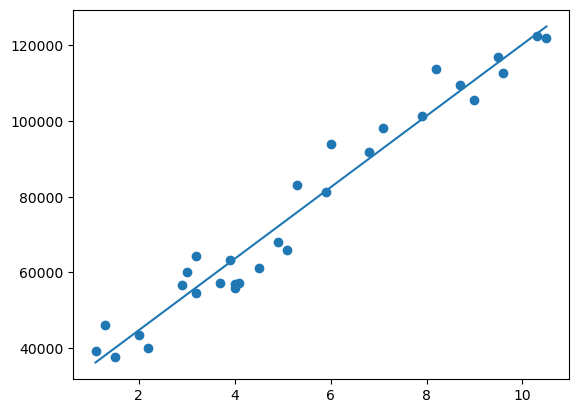

In [66]:
plt.scatter(X,y) # actual
plt.plot(X,model.predict(X)) # predicted

#### deep learning model

In [75]:
from keras.models import Sequential
from keras.layers import Dense,Input

model = Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(1))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer="SGD",loss="MSE")

In [77]:
history = model.fit(X,y,epochs = 500,verbose = 0)

#### predict new data

In [87]:
model.predict(np.array([[1.1]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[33789.61]], dtype=float32)

#### predicted values vs. actual values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


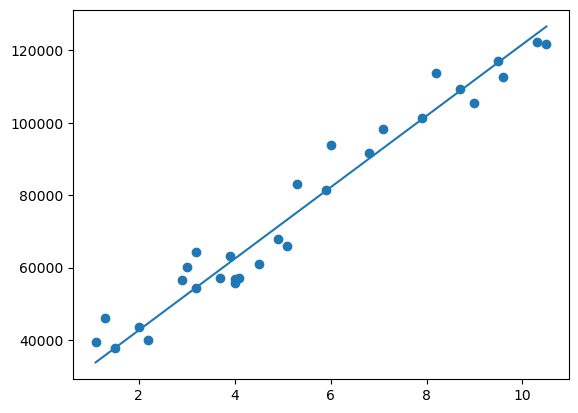

In [88]:
plt.scatter(X,y)
plt.plot(X,model.predict(X))

## So Yes Neural Network Can Do What Traditional Machine Learning Do

# is MLP is enough for all problems???

### MLP on Mnist Data

### load Mnist Data

In [128]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### show sample from data

5


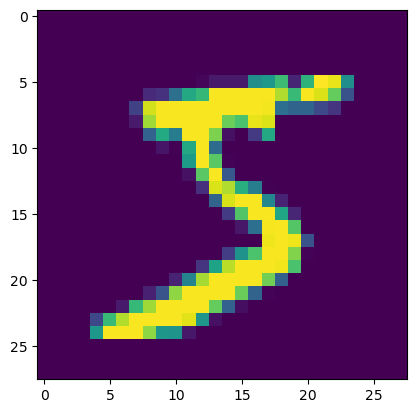

In [129]:
print(y_train[0])
plt.imshow(x_train[0])

#### reshape data

In [130]:
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

#### normalize data

In [131]:
x_train = x_train/255
x_test = x_test/255

#### build model

In [135]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [136]:
model.compile(loss = "SparseCategoricalCrossentropy",optimizer="adam",metrics=['accuracy'])

In [137]:
history = model.fit(x_train,y_train,epochs=10,verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9378 - loss: 0.2065
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9717 - loss: 0.0943
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9797 - loss: 0.0687
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9843 - loss: 0.0521
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9860 - loss: 0.0459
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9892 - loss: 0.0359
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9907 - loss: 0.0307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9919 - loss: 0.0270
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9931 - loss: 0.0238
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9933 - loss: 0.0225


In [138]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9810 - loss: 0.0855   


[0.08548248559236526, 0.9810000061988831]

# until now MLP can work with Pictures

### try another image data cifar10

In [140]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 603s 4us/step 


#### show sample from data

[6]


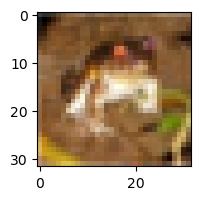

In [142]:
print(y_train[0])
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

#### reshape data

In [146]:
x_train = x_train.reshape(-1,3072)
x_test = x_test.reshape(-1,3072)

#### normalize data

In [147]:
x_train = x_train/255
x_test = x_test/255

#### build model

In [153]:
model = Sequential()
model.add(Input(shape=(3072,)))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,746,506 (6.66 MB)

 Trainable params: 1,746,506 (6.66 MB)

 Non-trainable params: 0 (0.00 B)

In [154]:
model.compile(loss = "SparseCategoricalCrossentropy",optimizer="adam",metrics=['accuracy'])

In [155]:
history = model.fit(x_train,y_train,epochs=10,validation_split = 0.2,verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.2977 - loss: 1.9138 - val_accuracy: 0.3559 - val_loss: 1.7864
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.3727 - loss: 1.7321 - val_accuracy: 0.3949 - val_loss: 1.7106
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4037 - loss: 1.6546 - val_accuracy: 0.4048 - val_loss: 1.6685
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4241 - loss: 1.5975 - val_accuracy: 0.4217 - val_loss: 1.6268
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.4424 - loss: 1.5551 - val_accuracy: 0.4277 - val_loss: 1.6228
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4575 - loss: 1.5172 - val_accuracy: 0.4462 - val_loss: 1.5522
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4684 - loss: 1.4806 - val_accuracy: 0.4498 - val_loss: 1.5644
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.4768 -

In [156]:
history = model.fit(x_train,y_train,epochs=10,validation_split = 0.2,verbose=1)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.5046 - loss: 1.3801 - val_accuracy: 0.4405 - val_loss: 1.5921
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.5099 - loss: 1.3586 - val_accuracy: 0.4635 - val_loss: 1.5384
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5220 - loss: 1.3387 - val_accuracy: 0.4773 - val_loss: 1.4938
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5248 - loss: 1.3180 - val_accuracy: 0.4784 - val_loss: 1.4988
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5313 - loss: 1.2972 - val_accuracy: 0.4753 - val_loss: 1.5160
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5401 - loss: 1.2779 - val_accuracy: 0.4776 - val_loss: 1.5017
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5489 - loss: 1.2572 - val_accuracy: 0.4844 - val_loss: 1.5130
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5510 -

In [157]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4865 - loss: 1.4765 


[1.476547122001648, 0.48649999499320984]

# now we can see MLP can not deal with this problem can not classify on pixels only needed another features as we can extract using CNN